In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
sber_data = pd.read_csv('/Users/dmitr/project_vs/data/data/sber_data.csv' ,sep = ',')
diabetes_data = pd.read_csv('C:/Users/dmitr/project_vs/data/data/diabetes_data.csv')

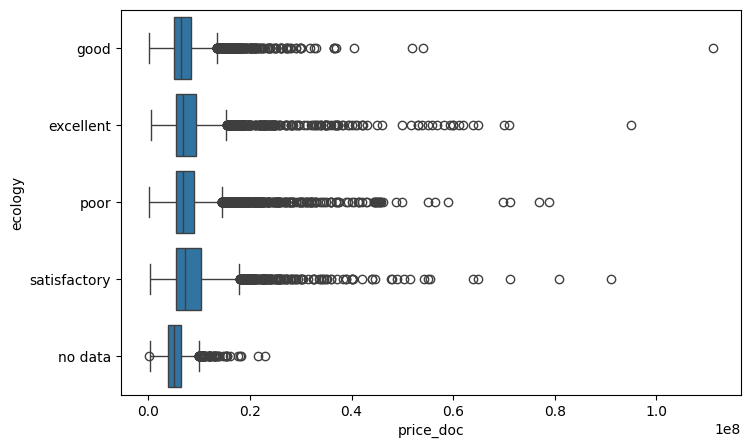

In [2]:
sber_data['sub_area'].value_counts()

fig = plt.figure(figsize=(8 ,5))
bxp = sns.boxplot(data= sber_data , y = 'ecology' ,x = 'price_doc')

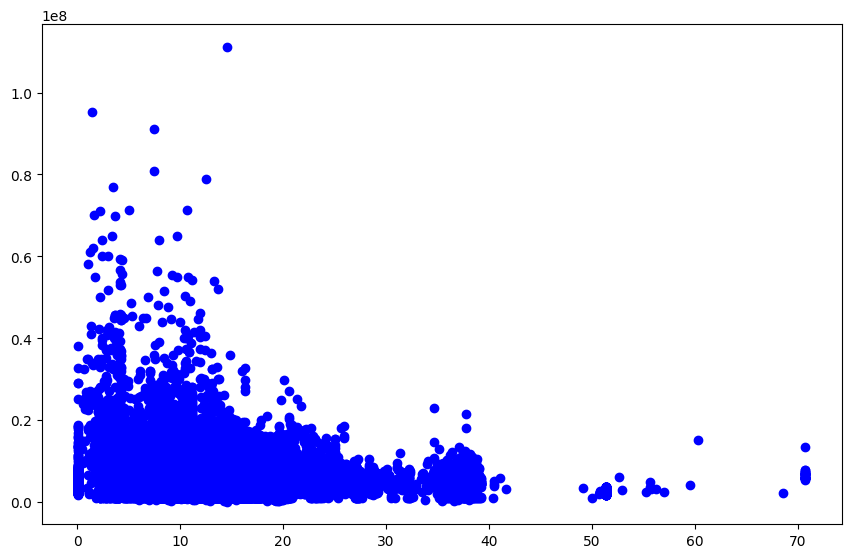

In [3]:
fig = plt.figure(figsize=(8,5))
axes = fig.add_axes([0,0,1,1])
axes.scatter(x = sber_data['kremlin_km'] , y = sber_data['price_doc'] , marker = 'o' , color = 'blue')

hospital_beds_raion          47.392603
preschool_quota              21.948738
school_quota                 21.938893
life_sq                      20.947786
floor                         0.548062
metro_min_walk                0.082045
metro_km_walk                 0.082045
railroad_station_walk_km      0.082045
railroad_station_walk_min     0.082045
dtype: float64

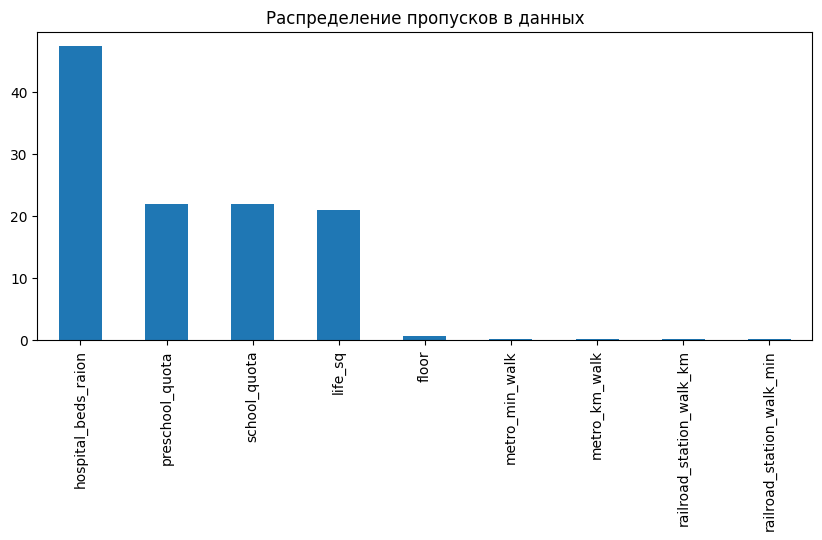

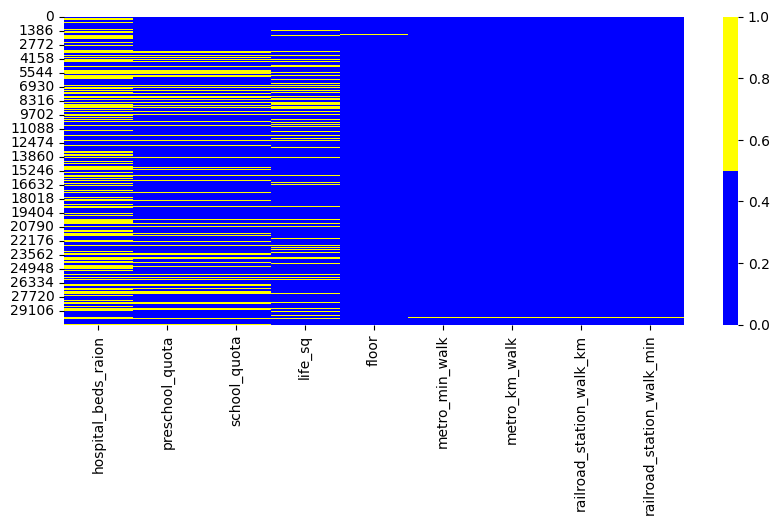

In [4]:
colls_null_per = sber_data.isnull().mean() * 100
colls_null = colls_null_per[colls_null_per >0].sort_values(ascending = False)
display(colls_null)

colls_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
)

colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = colls_null.index
ax = sns.heatmap(
    sber_data[cols].isnull(),
    cmap=sns.color_palette(colors),
)

In [5]:
drop_data = sber_data.copy()
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = drop_data.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
drop_data = drop_data.dropna(thresh=thresh, axis=1)#удаляем записи, в которых есть хотя бы 1 пропуск
drop_data = drop_data.dropna(how='any', axis=0)
#отображаем результирующую долю пропусков
drop_data.isnull().mean()
print(drop_data.shape)

(20888, 60)


array([[<Axes: title={'center': 'hospital_beds_raion'}>,
        <Axes: title={'center': 'preschool_quota'}>,
        <Axes: title={'center': 'school_quota'}>],
       [<Axes: title={'center': 'life_sq'}>,
        <Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'metro_min_walk'}>],
       [<Axes: title={'center': 'metro_km_walk'}>,
        <Axes: title={'center': 'railroad_station_walk_km'}>,
        <Axes: title={'center': 'railroad_station_walk_min'}>]],
      dtype=object)

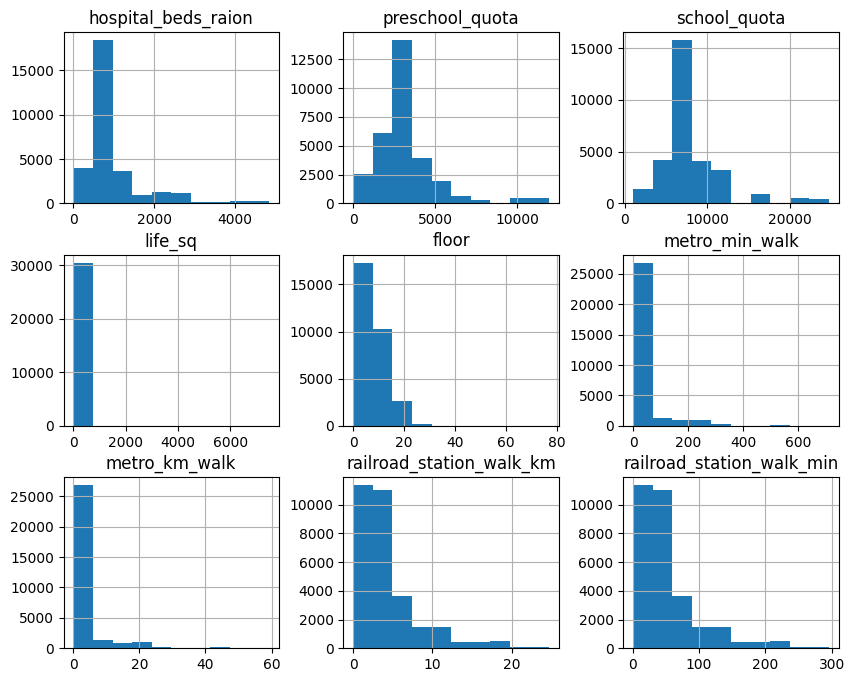

In [6]:
fill_data = sber_data.copy()

values = {
    'life_sq': fill_data['full_sq'],
    'metro_min_walk': fill_data['metro_min_walk'].median(),
    'metro_km_walk': fill_data['metro_km_walk'].median(),
    'railroad_station_walk_km': fill_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': fill_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': fill_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': fill_data['preschool_quota'].mode()[0],
    'school_quota': fill_data['school_quota'].mode()[0],
    'floor': fill_data['floor'].mode()[0]
}

fill_data = fill_data.fillna(values)
fill_data.isnull().mean()
cols = colls_null.index
fill_data[cols].hist(figsize = (10,8))

In [7]:
indicator_data = sber_data.copy()

for col in colls_null.index:
    indicator_data[col + '_was_null'] = indicator_data[col].isnull()


values = {
    'life_sq': indicator_data['full_sq'],
    'metro_min_walk': indicator_data['metro_min_walk'].median(),
    'metro_km_walk': indicator_data['metro_km_walk'].median(),
    'railroad_station_walk_km': indicator_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': indicator_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': indicator_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': indicator_data['preschool_quota'].mode()[0],
    'school_quota': indicator_data['school_quota'].mode()[0],
    'floor': indicator_data['floor'].mode()[0]
}

indicator_data = indicator_data.fillna(values)
display(indicator_data.isnull().mean())


id                                    0.0
full_sq                               0.0
life_sq                               0.0
floor                                 0.0
sub_area                              0.0
                                     ... 
floor_was_null                        0.0
metro_min_walk_was_null               0.0
metro_km_walk_was_null                0.0
railroad_station_walk_km_was_null     0.0
railroad_station_walk_min_was_null    0.0
Length: 70, dtype: float64

In [8]:
combine_data = sber_data.copy()

n = combine_data.shape[0]
thresh = n*0.7
combine_data = combine_data.dropna(thresh=thresh , axis=1)

m = combine_data.shape[1]
combine_data = combine_data.dropna(thresh = m-2, axis=0)



values = {
    'life_sq': combine_data['full_sq'],
    'metro_min_walk': combine_data['metro_min_walk'].median(),
    'metro_km_walk': combine_data['metro_km_walk'].median(),
    'railroad_station_walk_km': combine_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': combine_data['railroad_station_walk_min'].median(),
    'preschool_quota': combine_data['preschool_quota'].mode()[0],
    'school_quota': combine_data['school_quota'].mode()[0],
    'floor': combine_data['floor'].mode()[0]
}



combine_data = combine_data.fillna(values)
display(combine_data.isnull().mean())
combine_data.shape


id                                       0.0
full_sq                                  0.0
life_sq                                  0.0
floor                                    0.0
sub_area                                 0.0
preschool_quota                          0.0
preschool_education_centers_raion        0.0
school_quota                             0.0
school_education_centers_raion           0.0
school_education_centers_top_20_raion    0.0
healthcare_centers_raion                 0.0
university_top_20_raion                  0.0
sport_objects_raion                      0.0
additional_education_raion               0.0
culture_objects_top_25_raion             0.0
shopping_centers_raion                   0.0
office_raion                             0.0
oil_chemistry_raion                      0.0
railroad_terminal_raion                  0.0
nuclear_reactor_raion                    0.0
metro_min_avto                           0.0
metro_km_avto                            0.0
metro_min_

(26800, 60)

In [9]:
import pandas as pd
import numpy as np

df = pd.read_csv('test_data.csv')
n = df.shape[0]
thresh = n*0.5
df = df.dropna(thresh = thresh , axis = 1)


df = df.dropna(axis = 0 , thresh = df.shape[1] - 2)


values = { 'one' : df['one'].mean()
          ,'two' : df['two'].mean()
           ,'three' : df['three'].mean()
            ,'four' : df['four'].mode()[0]
}


df = df.fillna(values)




FileNotFoundError: [Errno 2] No such file or directory: 'test_data.csv'

In [1]:
def replace_duplicates(s):
    while True:
        found = False
        counts = {}
        
        # Count occurrences of each character
        for char in s:
            if char in counts:
                counts[char] += 1
            else:
                counts[char] = 1
        
        # Check for characters with duplicates
        for char, count in counts.items():
            if count >= 2:
                found = True
                next_char = 'a' if char == 'z' else chr(ord(char) + 1)
                # Ensure next_char is not already in the string
                while next_char in s:
                    next_char = 'a' if next_char == 'z' else chr(ord(next_char) + 1)
                # Replace the first two occurrences and append the next character
                s = s.replace(char, '', 2) + next_char
                break
        
        if not found:
            break
    
    return ''.join(sorted(s))

# Пример использования
input_str = input("Введите строку: ")
result = replace_duplicates(input_str)
print("Результат:", result)

# Пример вызова
input_str = "hhakafh"
result = replace_duplicates(input_str)
print("Результат:", result)  # Ожидаемый результат: hkfib


Результат: abcz
Результат: bfhik


In [5]:
sber_data['life_sq'].describe()

outliers = sber_data[sber_data['life_sq'] > sber_data['full_sq']]
print(outliers.shape[0])
cleaned = sber_data.drop(outliers.index , axis = 0)
cleaned.shape

display(sber_data['floor'].describe())


37


count    30304.000000
mean         7.670803
std          5.319989
min          0.000000
25%          3.000000
50%          6.500000
75%         11.000000
max         77.000000
Name: floor, dtype: float64

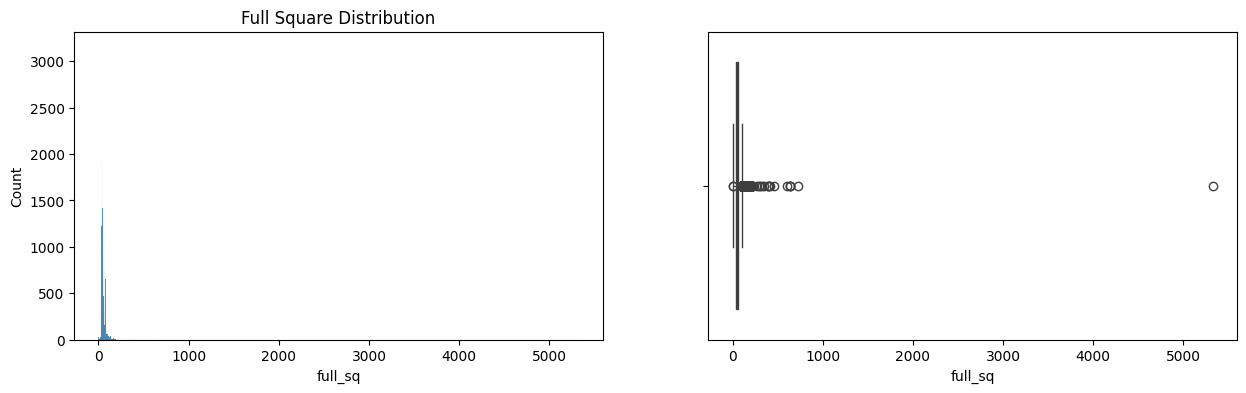

In [6]:
fig,axes = plt.subplots(nrows=1, ncols=2 , figsize = (15,4))
histplot = sns.histplot(data = sber_data , x ='full_sq', ax=axes[0])
histplot.set_title('Full Square Distribution')
boxplot = sns.boxplot(data = sber_data , x = 'full_sq' , ax = axes[1])

In [7]:
def outliers_iqr(data , feature):
    x = data[feature]
    quartile_1 , quartile_3 = x.quantile(0.25) , x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >=lower_bound) & (x <= upper_bound)]
    return outliers , cleaned
outliers, cleaned = outliers_iqr(sber_data, 'full_sq')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 963
Результирующее число записей: 29508


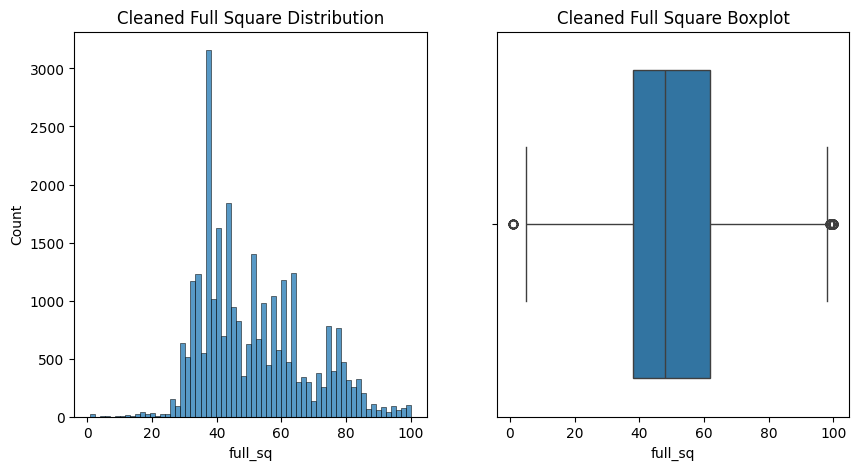

In [8]:
fig , axes = plt.subplots(nrows= 1 , ncols = 2 , figsize =(10 , 5))
histplot = sns.histplot(data= cleaned , x = 'full_sq' , ax = axes[0])
histplot.set_title('Cleaned Full Square Distribution')

boxplot = sns.boxplot(data= cleaned , x= 'full_sq' , ax = axes[1])
boxplot.set_title('Cleaned Full Square Boxplot');

In [9]:
def outliers_iqr_mod(data , feature , left = 1 , right = 6):
    x = data[feature]
    quartile_1 , quartile_3 = x.quantile(0.25) , x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >=lower_bound) & (x <= upper_bound)]
    return outliers , cleaned

outliers, cleaned = outliers_iqr_mod(sber_data, 'full_sq')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 59
Результирующее число записей: 30412


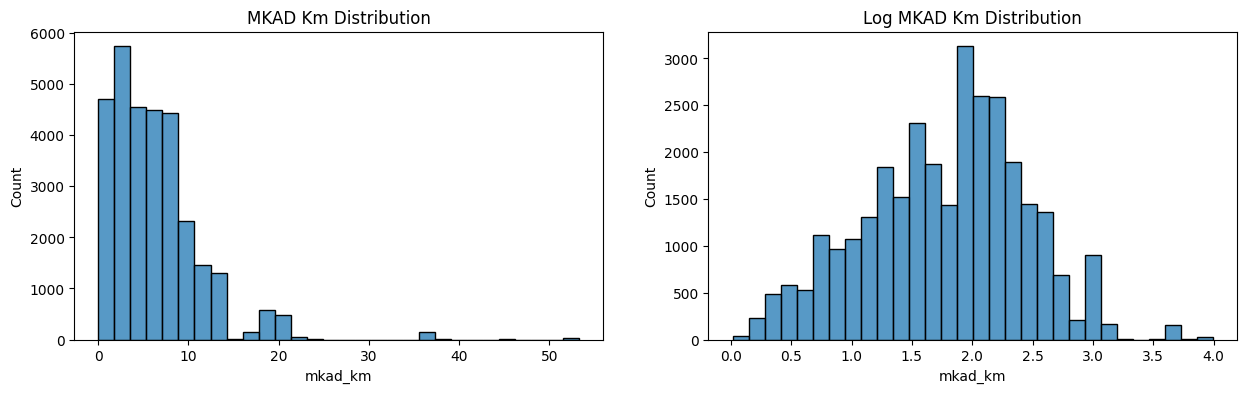

In [10]:
ig, axes = plt.subplots(1, 2, figsize=(15, 4))

#гистограмма исходного признака
histplot = sns.histplot(sber_data['mkad_km'], bins=30, ax=axes[0])
histplot.set_title('MKAD Km Distribution');

#гистограмма в логарифмическом масштабе
log_mkad_km= np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km , bins=30, ax=axes[1])
histplot.set_title('Log MKAD Km Distribution');

In [11]:
#Примечание: Численный показатель асимметрии можно вычислить с помощью метода:

#skew():
#print(log_mkad_km.skew())
# -0.14263612203024953


def outliers_z_score(data , feature , log_scale = False):
    if log_scale:
        x = np.log(data[feature] +1)
    else: 
        x = data[feature]
        
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned


outliers, cleaned = outliers_z_score(sber_data, 'mkad_km' , log_scale = True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

print (outliers['sub_area'].unique())

Число выбросов по методу z-отклонения: 33
Результирующее число записей: 30438
['Poselenie Rogovskoe' 'Poselenie Kievskij']


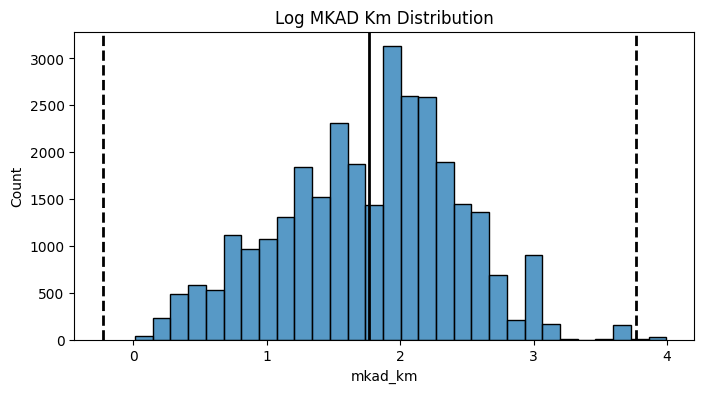

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_mkad_km = np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km, bins=30, ax=ax)
histplot.axvline(log_mkad_km.mean(), color='k', lw=2)
histplot.axvline(log_mkad_km.mean()+ 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.axvline(log_mkad_km.mean()- 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.set_title('Log MKAD Km Distribution');


In [13]:
def outliers_z_score_mod(data , feature , log_scale = False , right = 3.5 , left = 3):
    if log_scale:
        x = np.log(data[feature] +1)
    else: 
        x = data[feature]
        
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned


outliers, cleaned = outliers_z_score_mod(sber_data, 'mkad_km' , log_scale = True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')


Число выбросов по методу z-отклонения: 0
Результирующее число записей: 30471


Text(0.5, 1.0, 'Log MKAD Km Distribution')

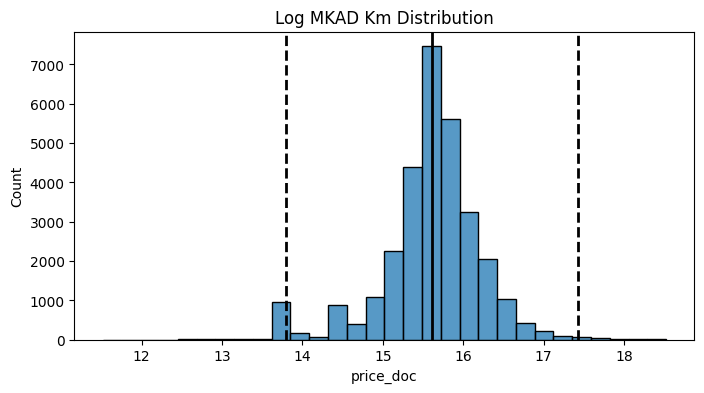

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_price_doc = np.log(sber_data['price_doc'] + 1)
histplot = sns.histplot(log_price_doc, bins=30, ax=ax)
histplot.axvline(log_price_doc.mean(), color='k', lw=2)
histplot.axvline(log_price_doc.mean()+ 3 * log_price_doc.std(), color='k', ls='--', lw=2)
histplot.axvline(log_price_doc.mean()- 3 * log_price_doc.std(), color='k', ls='--', lw=2)
histplot.set_title('Log MKAD Km Distribution')

In [15]:
def outliers_z_score_mod(data , feature , log_scale = False , right = 3.5 , left = 3):
    if log_scale:
        x = np.log(data[feature] +1)
    else: 
        x = data[feature]
        
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned


outliers, cleaned = outliers_z_score_mod(sber_data, 'price_doc' , log_scale = True , right = 3.7, left = 3.7)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')


Число выбросов по методу z-отклонения: 52
Результирующее число записей: 30419


In [16]:
def outliers_iqr_mod_log(data , feature , left = 1 , right = 6 , log_scale = False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1 , quartile_3 = x.quantile(0.25) , x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >=lower_bound) & (x <= upper_bound)]
    return outliers , cleaned

outliers, cleaned = outliers_iqr_mod_log(sber_data, 'price_doc' , log_scale=True , right = 3 , left= 3)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 92
Результирующее число записей: 30379


In [27]:
sber_data['id'].nunique() == sber_data.shape[0]
dupl_columns = list(sber_data.columns)
dupl_columns.remove('id')

mask = sber_data.duplicated(subset=dupl_columns)
sber_duplicates = sber_data[mask]



print(f'Число найденных дубликатов: {sber_duplicates.shape[0]}')

sber_dedupped = sber_data.drop_duplicates(subset= dupl_columns)

print(f'Результирующее число записей: {sber_dedupped.shape[0]}')


Число найденных дубликатов: 562
Результирующее число записей: 29909


In [ ]:
#Ищем неинформативные признаки

low_information_cols = []

for i in sber_data.columns :
    top_freq = sber_data[i].value_counts(normalize = True).max()
    nunique_ratio = sber_data[i].nunique() / sber_data[i].count()
    if top_freq > 0.95 :
        low_information_cols.append(i)
        print(f'{i}: {round(top_freq*100 , 2)} % одинаковых значений')
    if nunique_ratio > 0.95 :
        low_information_cols.append(i)
        print(f'{i}: {round(nunique_ratio*100, 2)}% уникальных значений')
    
    informations_sber_data = sber_data.drop(low_information_cols , axis = 1)
    print(f'Результирующее число признаков: {informations_sber_data.shape[1]}')

In [70]:
# Очищаем от дупликатов данные. Гендер убрали из списка из-за неинформативности

duplikates_data = list(diabetes_data.columns)
duplikates_data.remove('Gender')

mask = diabetes_data.duplicated(subset= duplikates_data)

diabetes_duplicates = diabetes_data[mask]
print(f'Число найденных дубликатов: {diabetes_duplicates.shape[0]}')
diabetes_deb = diabetes_data.drop_duplicates(subset = duplikates_data)

print(f'Результирующее число записей: {diabetes_deb.shape[0]}')


Число найденных дубликатов: 10
Результирующее число записей: 768


In [71]:
#Ищем неинформативные признаки

low_information_cols = []

for i in diabetes_data.columns :
    top_freq = diabetes_deb[i].value_counts(normalize = True).max()
    nunique_ratio = diabetes_deb[i].nunique() / diabetes_deb[i].count()
    if top_freq > 0.95 :
        low_information_cols.append(i)
        print(f'{i}: {round(top_freq*100 , 2)} % одинаковых значений')
    if nunique_ratio > 0.95 :
        low_information_cols.append(i)
        print(f'{i}: {round(nunique_ratio*100, 2)}% уникальных значений')
    
    informations_diabetes_data = diabetes_deb.drop(low_information_cols , axis = 1)
    print(f'Результирующее число признаков: {informations_diabetes_data.shape[1]}')

Результирующее число признаков: 10
Результирующее число признаков: 10
Результирующее число признаков: 10
Результирующее число признаков: 10
Результирующее число признаков: 10
Результирующее число признаков: 10
Результирующее число признаков: 10
Результирующее число признаков: 10
Результирующее число признаков: 10
Gender: 100.0 % одинаковых значений
Результирующее число признаков: 9


In [104]:
# Ищем пропуски в данных

columns_to_replace = ['Insulin', 'Glucose', 'BloodPressure' , 'SkinThickness', 'BMI']  # Add other relevant columns

for col in columns_to_replace:
    informations_diabetes_data[col] = informations_diabetes_data[col].replace(0, np.nan)


In [114]:

missing_percent = informations_diabetes_data.isnull().mean()
columns_to_drop = missing_percent[missing_percent > 0.3].index
informations_diabetes_data.drop(columns_to_drop , axis = 1 , inplace = True)
remaining_columns = informations_diabetes_data.shape[1] 

print("Number of columns remaining:", remaining_columns)





Number of columns remaining: 8
<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   BMI                       757 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 54.0 KB
Index(['Insulin'], dtype='object')


In [122]:
#Удалите из данных только те строки, в которых содержится более двух пропусков одновременно. Чему равно результирующее число записей в таблице?



drop_data_diabets = informations_diabetes_data.copy()
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = drop_data_diabets.shape[1] - 2
#удаляем столбцы, в которых более 30% (100-70) пропусков
drop_data_diabets = drop_data_diabets.dropna(thresh=thresh, axis=0)#удаляем записи, в которых есть хотя бы 1 пропуск
print(drop_data_diabets.shape[0])

values ={'Pregnancies' : drop_data_diabets['Pregnancies'].median() 
         , 'Glucose': drop_data_diabets['Glucose'].median()
   ,'BloodPressure':   drop_data_diabets['BloodPressure'].median()
   ,'SkinThickness' : drop_data_diabets['SkinThickness'].median()
    ,'BMI' : drop_data_diabets['BMI'].median()
    ,'DiabetesPedigreeFunction' : drop_data_diabets['DiabetesPedigreeFunction'].median()
    ,'Age' : drop_data_diabets['Age'].median()
    ,'Outcome' : drop_data_diabets['Outcome'].median()


}
combine_data = drop_data_diabets.fillna(values)
display(combine_data.mean())
combine_data.shape





761


Pregnancies                   3.840999
Glucose                     121.900131
BloodPressure                72.390276
SkinThickness                29.109067
BMI                          32.456636
DiabetesPedigreeFunction      0.474126
Age                          33.323259
Outcome                       0.350854
dtype: float64

(761, 8)

In [129]:
def outliers_iqr_mod(data , feature , left = 1.5, right = 1.5):
    x = data[feature]
    quartile_1 , quartile_3 = x.quantile(0.25) , x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >=lower_bound) & (x <= upper_bound)]
    return outliers , cleaned

outliers, cleaned = outliers_iqr_mod(combine_data, 'DiabetesPedigreeFunction')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 29
Результирующее число записей: 732


In [125]:



def outliers_z_score(data , feature , log_scale = False):
    if log_scale:
        x = np.log(data[feature] +1)
    else: 
        x = data[feature]
        
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned


outliers, cleaned = outliers_z_score(combine_data, 'SkinThickness' , log_scale = False)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')


Число выбросов по методу z-отклонения: 4
Результирующее число записей: 757


In [ ]:



def outliers_z_score(data , feature , log_scale = False):
    if log_scale:
        x = np.log(data[feature] +1)
    else: 
        x = data[feature]
        
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned


outliers, cleaned = outliers_z_score(combine_data, 'SkinThickness' , log_scale = False)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')


In [128]:
def outliers_iqr_mod_log(data , feature , left = 1 , right = 6 , log_scale = False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1 , quartile_3 = x.quantile(0.25) , x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >=lower_bound) & (x <= upper_bound)]
    return outliers , cleaned

outliers, cleaned = outliers_iqr_mod_log(combine_data, 'DiabetesPedigreeFunction' , log_scale=True , right = 3 , left= 3)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 0
Результирующее число записей: 761


In [ ]:


# Эталонные решения к модулю!!!!!







#4. Работа с пропусками: методы обработки
#ЗАДАНИЕ 4.6

df = pd.read_csv('test_data.csv')
thresh = df.shape[0]*0.5
df = df.dropna(thresh=thresh, axis=1)
thresh2 = df.shape[1] - 2
df = df.dropna(thresh=thresh2, axis=0)
df = df.fillna({
    'one': df['one'].mean(),
    'two': df['two'].mean(),
    'four': df['four'].mode()[0]})






#6. Методы выявления выбросов
#ЗАДАНИЕ 6.1

def outliers_iqr_mod(data, feature, left=1.5, right=1.5):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
#ЗАДАНИЕ 6.2

outliers, cleaned = outliers_iqr_mod(sber_data, 'full_sq', left=1, right=6)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')
ЗАДАНИЕ 6.3

import numpy as np

def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
#ЗАДАНИЕ 6.4

outliers, cleaned = outliers_z_score_mod(sber_data, 'mkad_km', right=3.5, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')
ЗАДАНИЕ 6.5

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_price = np.log(sber_data['price_doc'])
histplot = sns.histplot(log_price, bins=30, ax=ax)
histplot.set_title('Log Price Distribution');
histplot.axvline(log_price.mean(), color='k', lw=2)
histplot.axvline(log_price.mean()+ 3 * log_price.std(), color='k', ls='--', lw=2)
histplot.axvline(log_price.mean()- 3 * log_price.std(), color='k', ls='--', lw=2);
#ЗАДАНИЕ 6.7

def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x= data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_iqr_mod(sber_data, 'price_doc', left=3, right=3, log_scale=True)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')

In [4]:
'''Имеются две базы данных (два листа Excel-файла): база с ценами конкурентов (Data_Parsing) и внутренняя база компании (Data_Company).

В базе парсинга есть два id, однозначно определяющие товар: producer_id и producer_color.

В базе компании есть два аналогичных поля: item_id и color_id.

Нам известно, что коды в двух базах отличаются наличием набора служебных символов. В базе парсинга встречаются следующие символы: _, -, ~, \\, /.

Необходимо:


Считать данные из Excel в DataFrame (Data_Parsing) и (Data_Company).
Подтянуть к базе парсинга данные из базы компании (item_id, color_id, current_price) и сформировать столбец разницы цен в % (цена конкурента к нашей цене).
Определить сильные отклонения от среднего в разности цен в пределах бренда-категории (то есть убрать случайные выбросы, сильно искажающие сравнение). Критерий — по вкусу, написать комментарий в коде.
Записать новый файл Excel с базой парсинга, приклееными к ней столбцами из пункта 2 и с учётом пункта 3 (можно добавить столбец outlier и проставить Yes для выбросов).'''

data_tsum = '/Users/dmitr/project_vs/data/data/Data_TSUM.xlsx'
exel_reader = pd.ExcelFile(data_tsum)
data_parsing = exel_reader.parse('Data_Parsing')
data_company = exel_reader.parse('Data_Company')


def normalize_id (id):
    return id.replace('_', '').replace('-', '').replace('~', '').replace('\\','').replace('/','')


data_parsing['normalized_producer_id'] =data_parsing['producer_id'].apply(normalize_id)
data_parsing['normalized_producer_color'] = data_parsing['producer_color'].apply(normalize_id)
data_company['normalized_item_id'] = data_company['item_id'].apply(normalize_id)
data_company['normalized_color_id'] = data_company['color_id'].apply(normalize_id)


merge_data = pd.merge(data_parsing , data_company ,left_on= ['normalized_producer_id', 'normalized_producer_color'], right_on=['normalized_item_id', 'normalized_color_id'], how='left')

merge_data['price_diference'] = (merge_data['current price'] - merge_data['price']) / merge_data['price'] * 100

mean_df = merge_data['price_diference'].mean()
std_df = merge_data['price_diference'].std()

threshold = 2 

merge_data['outlier'] = np.where(abs(merge_data['price_diference'] - mean_df) > threshold * std_df , 'Yes' , 'No')


merge_data.to_excel('Mergered_data.xlsx' , index= False)



In [5]:
merge_data

,brand_x,Category_x,producer_id,producer_color,price,normalized_producer_id,normalized_producer_color,brand_y,Category_y,item_id,color_id,current price,normalized_item_id,normalized_color_id,price_diference,outlier
0,Valentino,Shoes,aaaaa1111_11,black,167,aaaaa111111,black,Valentino,Shoes,aaaaa111111,black,247,aaaaa111111,black,47.904192,No
1,Valentino,Shoes,aaaaa1111_12,black,188,aaaaa111112,black,Valentino,Shoes,aaaaa111112,black,161,aaaaa111112,black,-14.361702,No
2,Valentino,Shoes,aaaaa1111_13,black,184,aaaaa111113,black,Valentino,Shoes,aaaaa111113,black,234,aaaaa111113,black,27.173913,No
3,Valentino,Shoes,aaaaa1111_14,bla//ck,196,aaaaa111114,black,Valentino,Shoes,aaaaa111114,black,167,aaaaa111114,black,-14.795918,No
4,Valentino,Shoes,aaaaa1111_15,bla\\ck,250,aaaaa111115,black,Valentino,Shoes,aaaaa111115,black,153,aaaaa111115,black,-38.800000,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,Stone Island,Bags,sssss1111_31,~~~red,164,sssss111131,red,Stone Island,Bags,sssss111131,red,165,sssss111131,red,0.609756,No
71,Stone Island,Bags,sssss1111_32,~~~red,158,sssss111132,red,Stone Island,Bags,sssss111132,red,196,sssss111132,red,24.050633,No
72,Stone Island,Bags,sssss1111_33,~~~red,194,sssss111133,red,Stone Island,Bags,sssss111133,red,236,sssss111133,red,21.649485,No
73,Stone Island,Bags,sssss1111_34,~~~red,256,sssss111134,red,Stone Island,Bags,sssss111134,red,222,sssss111134,red,-13.281250,No
